In [1]:
import gensim.downloader
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [52]:
synonyms = pd.read_csv("synonym.csv")
print(synonyms)
models= {}

       question        answer              0               1              2  \
0    enormously  tremendously  appropriately        uniquely   tremendously   
1    provisions  stipulations   stipulations  interrelations  jurisdictions   
2   haphazardly      randomly    dangerously         densely       randomly   
3     prominent   conspicuous       battered         ancient     mysterious   
4        zenith      pinnacle     completion        pinnacle         outset   
..          ...           ...            ...             ...            ...   
75      fashion        manner         ration          fathom          craze   
76     marketed          sold         frozen            sold      sweetened   
77       bigger        larger       steadier          closer         larger   
78        roots       origins        origins         rituals           cure   
79     normally    ordinarily      haltingly      ordinarily    permanently   

                  3  
0         decidedly  
1   int

# Get random baseline

In [53]:
output = {"question": [], "answer": [], "model_answer": [], "label": []}
for index, row in synonyms.iterrows():
    question = row['question']
    answer = row['answer']
    options = [row['0'], row['1'], row['2'], row['3']]
    model_answer = random.choice(options)
                  
    if model_answer == answer:    
        label = "correct"
    else:
        label = "wrong"                  

    output["question"].append(question)
    output["answer"].append(answer)
    output["model_answer"].append(model_answer)
    output["label"].append(label)
    
random_baseline = pd.DataFrame(data=output)
correct_count = len([True for label in random_baseline["label"] if label == "correct"])
accuracy = correct_count / random_baseline.shape[0]
print("The random baseline accuracy is: " + str(accuracy))

The random baseline accuracy is: 0.2625


In [4]:
for model in gensim.downloader.info()['models'].keys():
  print(model)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [54]:
def get_answers(model, synonyms):
  output = {"question": [], "answer": [], "model_answer": [], "label": []}
  for index, row in synonyms.iterrows():
    question = row['question']
    answer = row['answer']
    options = [row['0'], row['1'], row['2'], row['3']]
    existed_words = [option for option in options if option in model]
        
    if question in model and len(existed_words)>0:  
      sorted_answers = list(sorted(existed_words, key=lambda x: model.similarity(question, x)))
      model_answer = sorted_answers[-1]
                    
      if model_answer == answer:
        label = "correct"
      else:
        label = "wrong"
                    
    else:
      model_answer = random.choice(options)
      label = "guess"

    output["question"].append(question)
    output["answer"].append(answer)
    output["model_answer"].append(model_answer)
    output["label"].append(label)
                    
  return pd.DataFrame(data=output)

In [4]:
def get_graph_for_analysis(filename):
    df = pd.read_csv(filename)
    label_mapping = {'correct': 1, 'guess': 0, 'wrong': -1}
    df['label_mapped'] = df['label'].map(label_mapping)
    plt.figure(figsize=(90, 6))
    plt.bar(df['question'], df['label_mapped'], color='green')
    plt.xlabel('Question')
    plt.ylabel('Label')
    plt.title('Label Visualization')
    plt.show()

In [22]:
def get_pie_chart_for_analysis(filename):
    df = pd.read_csv(filename)
    label_counts = df['label'].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(np.array(label_counts.values), labels =label_counts.index.values, startangle=90, autopct='%1.1f%%')
    plt.title('Percentage of Labels in ' + filename)

In [55]:
word2vec_google_news_300_model = gensim.downloader.load("word2vec-google-news-300")

In [56]:
models['word2vec-google-news-300'] = word2vec_google_news_300_model
print(list(models.keys()))

['word2vec-google-news-300']


In [57]:
word2vec_google_news_300_answer = get_answers(word2vec_google_news_300_model, synonyms)
word2vec_google_news_300_answer.to_csv("word2vec-google-news-300-details.csv")
print(word2vec_google_news_300_answer)

       question        answer  model_answer    label
0    enormously  tremendously  tremendously  correct
1    provisions  stipulations  stipulations  correct
2   haphazardly      randomly      randomly  correct
3     prominent   conspicuous   conspicuous  correct
4        zenith      pinnacle      pinnacle  correct
..          ...           ...           ...      ...
75      fashion        manner        manner  correct
76     marketed          sold          sold  correct
77       bigger        larger        larger  correct
78        roots       origins       origins  correct
79     normally    ordinarily    ordinarily  correct

[80 rows x 4 columns]


# fasttext-wiki-news-subwords-300

In [58]:
fasttext_wiki_news_subwords_300_model = gensim.downloader.load("fasttext-wiki-news-subwords-300")

In [59]:
models['fasttext-wiki-news-subwords-300'] = fasttext_wiki_news_subwords_300_model
print(list(models.keys()))

['word2vec-google-news-300', 'fasttext-wiki-news-subwords-300']


In [60]:
fasttext_wiki_news_subwords_300_answer = get_answers(fasttext_wiki_news_subwords_300_model, synonyms)
fasttext_wiki_news_subwords_300_answer.to_csv("fasttext-wiki-news-subwords-300-details.csv")
print(fasttext_wiki_news_subwords_300_answer)

       question        answer  model_answer    label
0    enormously  tremendously  tremendously  correct
1    provisions  stipulations  stipulations  correct
2   haphazardly      randomly      randomly  correct
3     prominent   conspicuous   conspicuous  correct
4        zenith      pinnacle      pinnacle  correct
..          ...           ...           ...      ...
75      fashion        manner        manner  correct
76     marketed          sold          sold  correct
77       bigger        larger        larger  correct
78        roots       origins       origins  correct
79     normally    ordinarily    ordinarily  correct

[80 rows x 4 columns]


# glove-wiki-gigaword-300

In [61]:
glove_wiki_gigaword_300_model = gensim.downloader.load("glove-wiki-gigaword-300")

In [62]:
models['glove-wiki-gigaword-300'] = glove_wiki_gigaword_300_model
print(list(models.keys()))

['word2vec-google-news-300', 'fasttext-wiki-news-subwords-300', 'glove-wiki-gigaword-300']


In [63]:
glove_wiki_gigaword_300_answer = get_answers(glove_wiki_gigaword_300_model, synonyms)
glove_wiki_gigaword_300_answer.to_csv("glove-wiki-gigaword-300-details.csv")
print(glove_wiki_gigaword_300_answer)

       question        answer  model_answer    label
0    enormously  tremendously  tremendously  correct
1    provisions  stipulations  stipulations  correct
2   haphazardly      randomly      randomly  correct
3     prominent   conspicuous   conspicuous  correct
4        zenith      pinnacle      pinnacle  correct
..          ...           ...           ...      ...
75      fashion        manner        manner  correct
76     marketed          sold          sold  correct
77       bigger        larger        larger  correct
78        roots       origins       origins  correct
79     normally    ordinarily    ordinarily  correct

[80 rows x 4 columns]


# glove-twitter-100

In [64]:
glove_twitter_100_model = gensim.downloader.load("glove-twitter-100")

In [65]:
models['glove-twitter-100'] = glove_twitter_100_model
print(list(models.keys()))

['word2vec-google-news-300', 'fasttext-wiki-news-subwords-300', 'glove-wiki-gigaword-300', 'glove-twitter-100']


In [66]:
glove_twitter_100_answer = get_answers(glove_twitter_100_model, synonyms)
glove_twitter_100_answer.to_csv("glove-twitter-100-details.csv")
print(glove_twitter_100_answer)

       question        answer   model_answer    label
0    enormously  tremendously   tremendously  correct
1    provisions  stipulations  jurisdictions    wrong
2   haphazardly      randomly        densely    wrong
3     prominent   conspicuous     mysterious    wrong
4        zenith      pinnacle       pinnacle  correct
..          ...           ...            ...      ...
75      fashion        manner          craze    wrong
76     marketed          sold        diluted    wrong
77       bigger        larger         larger  correct
78        roots       origins        origins  correct
79     normally    ordinarily    permanently    wrong

[80 rows x 4 columns]


# glove-twitter-200

In [67]:
glove_twitter_200_model = gensim.downloader.load("glove-twitter-200")

In [68]:
models['glove-twitter-200'] = glove_twitter_200_model
print(list(models.keys()))

['word2vec-google-news-300', 'fasttext-wiki-news-subwords-300', 'glove-wiki-gigaword-300', 'glove-twitter-100', 'glove-twitter-200']


In [69]:
glove_twitter_200_answer = get_answers(glove_twitter_200_model, synonyms)
glove_twitter_200_answer.to_csv("glove-twitter-200-details.csv")
print(glove_twitter_200_answer)

       question        answer   model_answer    label
0    enormously  tremendously   tremendously  correct
1    provisions  stipulations  jurisdictions    wrong
2   haphazardly      randomly        densely    wrong
3     prominent   conspicuous     mysterious    wrong
4        zenith      pinnacle       pinnacle  correct
..          ...           ...            ...      ...
75      fashion        manner          craze    wrong
76     marketed          sold           sold  correct
77       bigger        larger         larger  correct
78        roots       origins        origins  correct
79     normally    ordinarily    permanently    wrong

[80 rows x 4 columns]


# Analysis

In [70]:
vocabulary_size = len(models['word2vec-google-news-300'].index_to_key)

print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 3000000


In [71]:
details = pd.read_csv("word2vec-google-news-300-details.csv")

correct_count = len([True for label in details["label"] if label == "correct"])
answered_count = len([True for label in details["label"] if label != "guess"])

print("name:", "word2vec-google-news-300")
print("Vocabulary Size:", vocabulary_size)
print("correct:", correct_count)
print("answered:", answered_count)
print("accuracy:", correct_count / answered_count if answered_count > 0 else 0)


name: word2vec-google-news-300
Vocabulary Size: 3000000
correct: 70
answered: 79
accuracy: 0.8860759493670886


In [72]:
analysis = {"model": [], "vocabulary": [], "correct": [], "answered": [], "accuracy": []} 

for model in models:
  output_file = f"{model}-details.csv"
  output = pd.read_csv(output_file)

  correct_count = len([True for label in output["label"] if label == "correct"])
  answered_count = len([True for label in output["label"] if label != "guess"])

  analysis["model"].append(model)
  analysis["vocabulary"].append(len(models[model].index_to_key))
  analysis["correct"].append(correct_count)
  analysis["answered"].append(answered_count)
  analysis["accuracy"].append(correct_count / answered_count if answered_count > 0 else 0)

analysis = pd.DataFrame(data=analysis)
print(analysis)
analysis.to_csv("analysis.csv", index=False)

                             model  vocabulary  correct  answered  accuracy
0         word2vec-google-news-300     3000000       70        79  0.886076
1  fasttext-wiki-news-subwords-300      999999       74        80  0.925000
2          glove-wiki-gigaword-300      400000       71        80  0.887500
3                glove-twitter-100     1193514       39        78  0.500000
4                glove-twitter-200     1193514       44        78  0.564103


# Graphs for Results

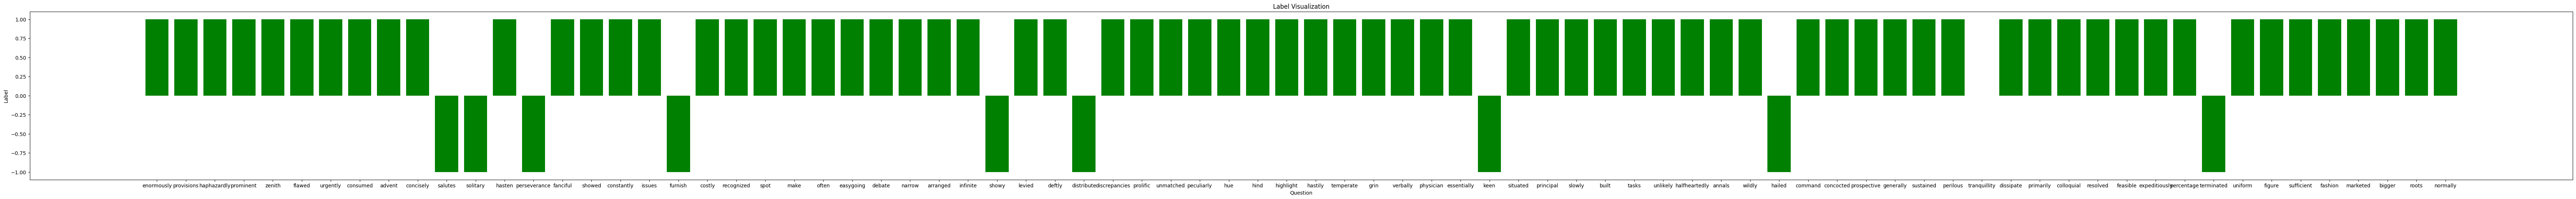

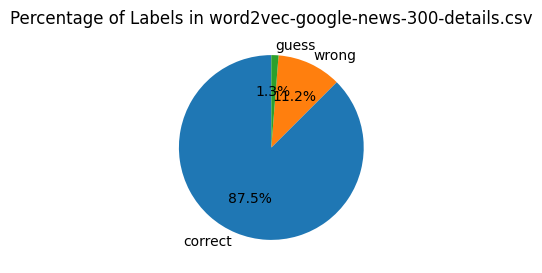

In [73]:
get_graph_for_analysis("word2vec-google-news-300-details.csv")
get_pie_chart_for_analysis("word2vec-google-news-300-details.csv")

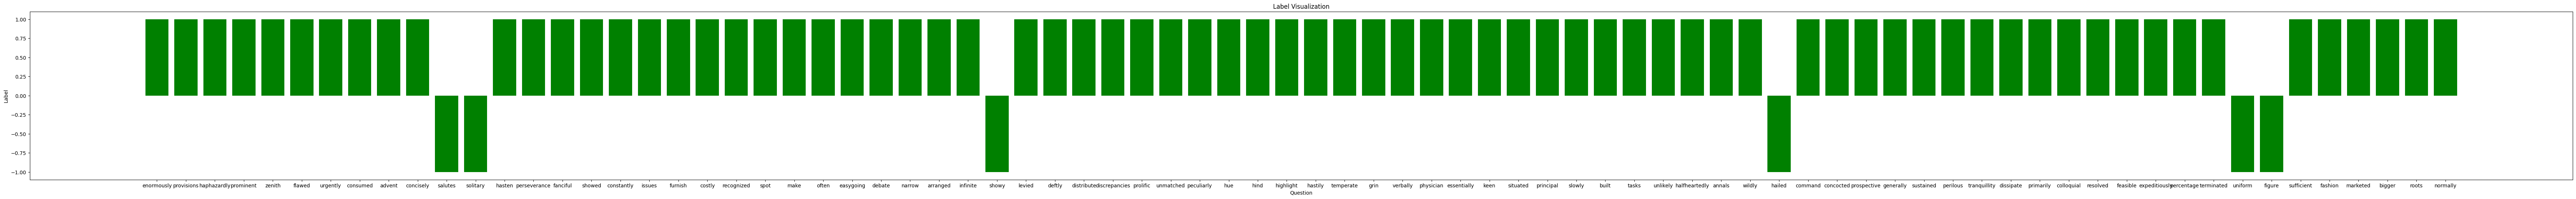

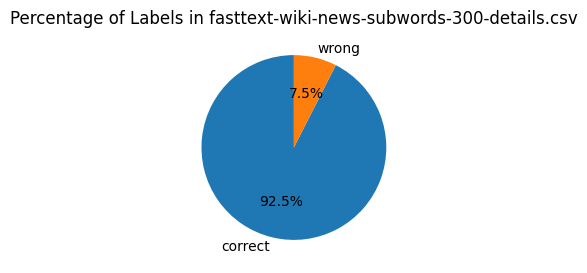

In [74]:
get_graph_for_analysis("fasttext-wiki-news-subwords-300-details.csv")
get_pie_chart_for_analysis("fasttext-wiki-news-subwords-300-details.csv")

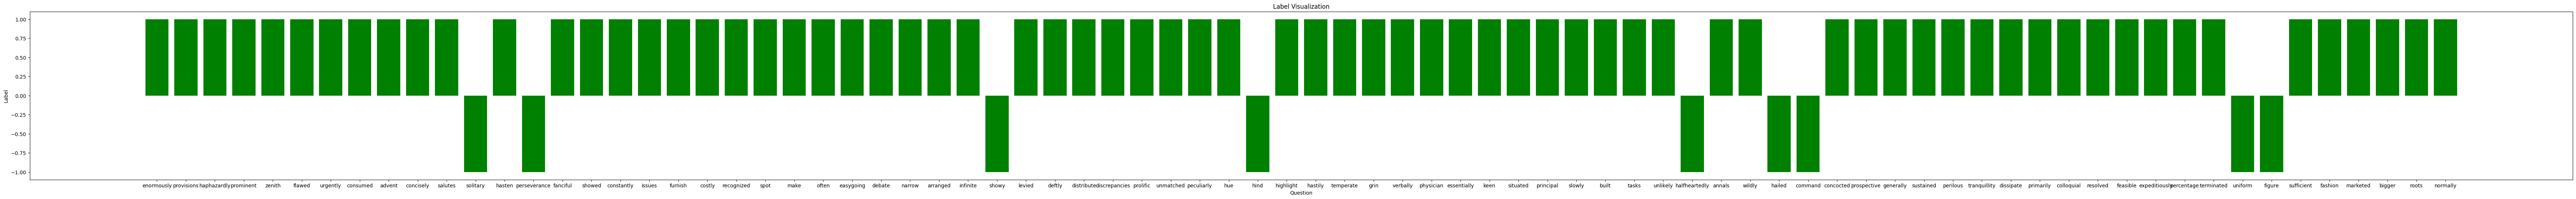

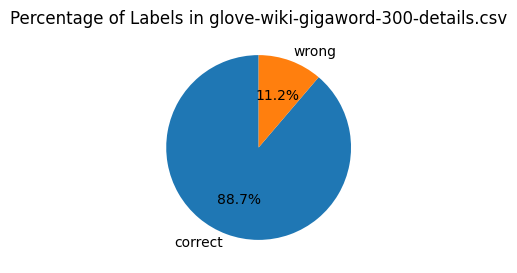

In [75]:
get_graph_for_analysis("glove-wiki-gigaword-300-details.csv")
get_pie_chart_for_analysis("glove-wiki-gigaword-300-details.csv")

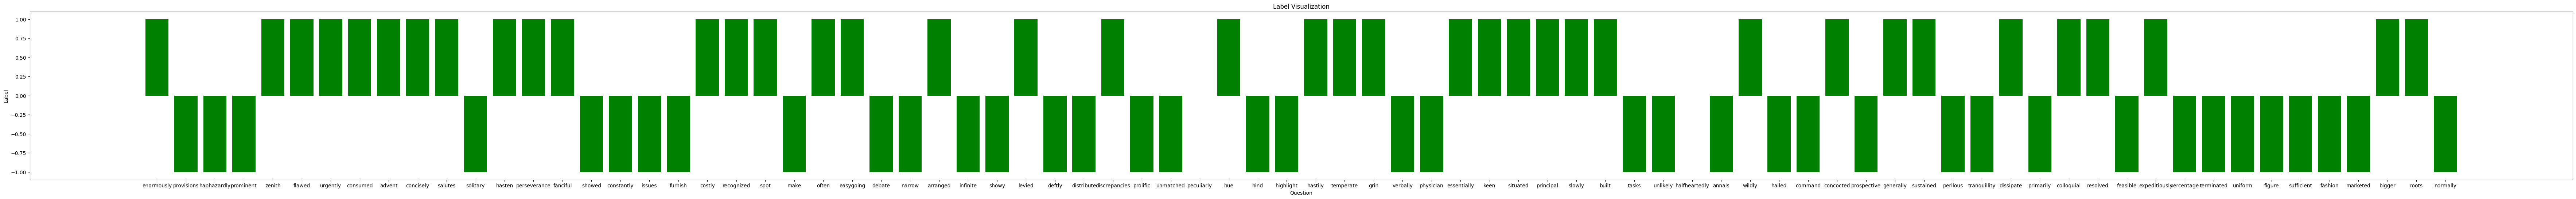

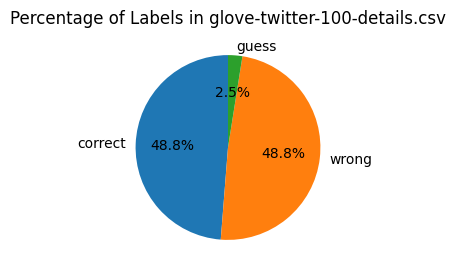

In [76]:
get_graph_for_analysis("glove-twitter-100-details.csv")
get_pie_chart_for_analysis("glove-twitter-100-details.csv")

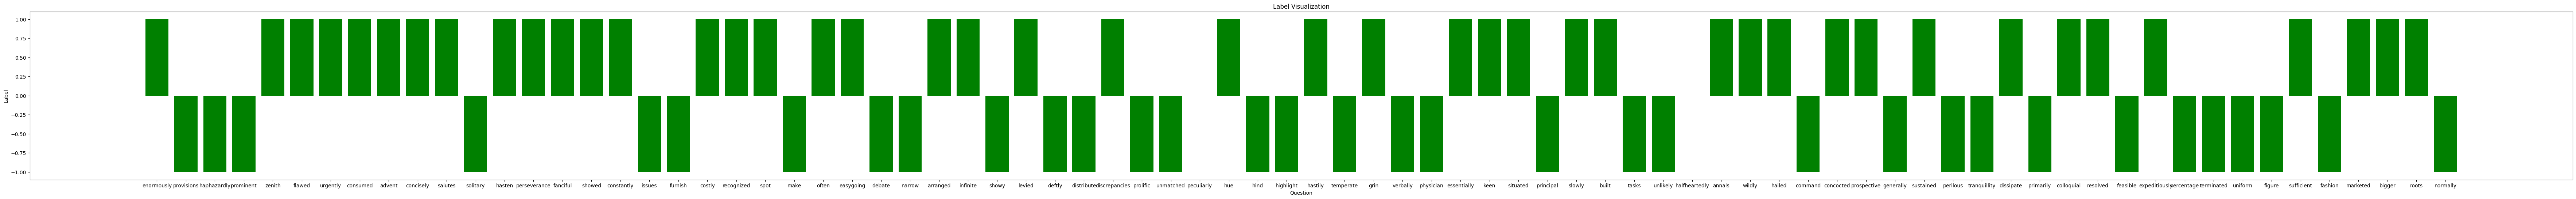

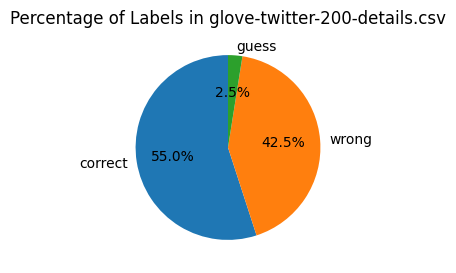

In [77]:
get_graph_for_analysis("glove-twitter-200-details.csv")
get_pie_chart_for_analysis("glove-twitter-200-details.csv")